# Lecture 26 – Data 100, Spring 2025

Data 100, Spring 2025

[Acknowledgments Page](https://ds100.org/sp25/acks/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris, _ = datasets.load_iris(return_X_y=True, as_frame=True)
iris.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", 
                     "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"}, inplace=True)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
145,6.7,3.0,5.2,2.3
104,6.5,3.0,5.8,2.2
146,6.3,2.5,5.0,1.9
16,5.4,3.9,1.3,0.4
71,6.1,2.8,4.0,1.3
109,7.2,3.6,6.1,2.5
49,5.0,3.3,1.4,0.2
4,5.0,3.6,1.4,0.2
8,4.4,2.9,1.4,0.2


## K-Means Clustering

In today's lecture, we will use the data from the `iris` dataset from `sklearn` to perform clustering using two features, `petal_length` and `petal_width.` Summary of the algorithm:
- Repeat until convergence:
    - Color points according to the closest center.
    - Move the center for each color to the center of points with that color.


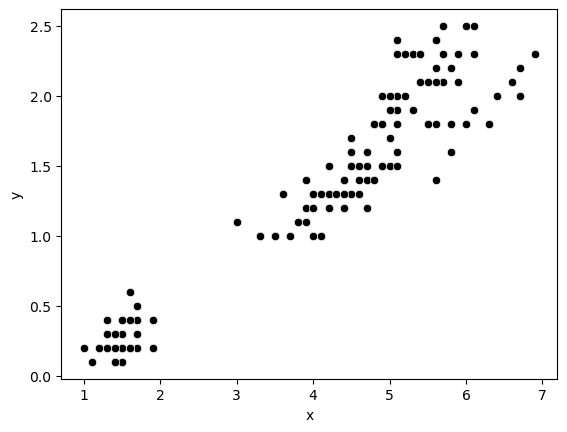

In [3]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", color="black")
plt.xlabel('x')
plt.ylabel('y');

In [4]:
class Center():
    def __init__(self, data):
        """generates a random center inside the region bounded by the data"""        
        num_dimensions = data.shape[1]
        self.coordinates = np.array([0.0] * num_dimensions)
        for i in range(num_dimensions):
            min_value = np.min(data[:, i])
            max_value = np.max(data[:, i])            
            random_value = random.uniform(min_value, max_value)            
            self.coordinates[i] = random_value
    
    def __str__(self):
        return str(self.coordinates)

    def __repr__(self):
        return repr(self.coordinates)

    def dist(self, data_point):
        return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))
    
    def dist_sq(self, data_point):
        return np.sum((self.coordinates - data_point)**2, axis = 1)

In [5]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)

In [6]:
# Force coordinates from the lecture demo
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [7]:
def plot_centers_and_black_data(iris, centers):
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)    
    sns.scatterplot(data=iris, x="petal_length", y="petal_width", color="black")
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.append('data')
    plt.legend(legend_text)

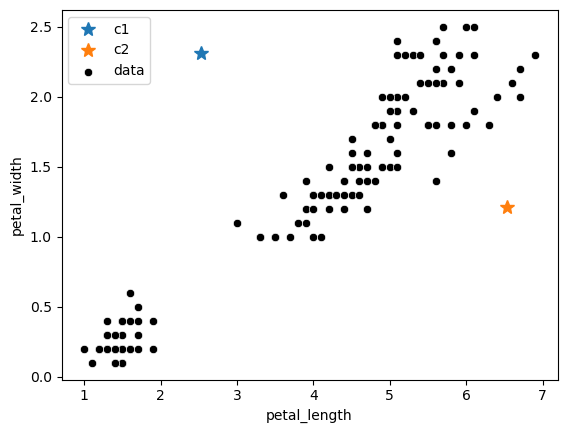

In [8]:
plot_centers_and_black_data(iris, (c1, c2))

In [9]:
def get_cluster_number(dists):
    return np.where(dists == np.min(dists))[0][0]

In [10]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,dist1,dist2,cluster
0,5.1,3.5,1.4,0.2,2.390890,5.231474,0
1,4.9,3.0,1.4,0.2,2.390890,5.231474,0
2,4.7,3.2,1.3,0.2,2.439484,5.329623,0
3,4.6,3.1,1.5,0.2,2.345555,5.133398,0
4,5.0,3.6,1.4,0.2,2.390890,5.231474,0


In [11]:
iris["cluster"].value_counts()

cluster
0    79
1    71
Name: count, dtype: int64

In [12]:
def plot_centers_and_colorized_data(iris, centers):
    plt.figure()
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], 
                 marker='*', markersize=10, linestyle="None")  
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="cluster", palette=current_palette)  
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.append('data')
    plt.legend(legend_text)

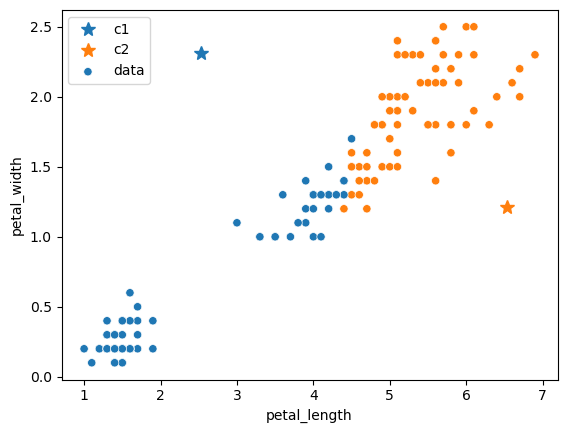

In [13]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [14]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

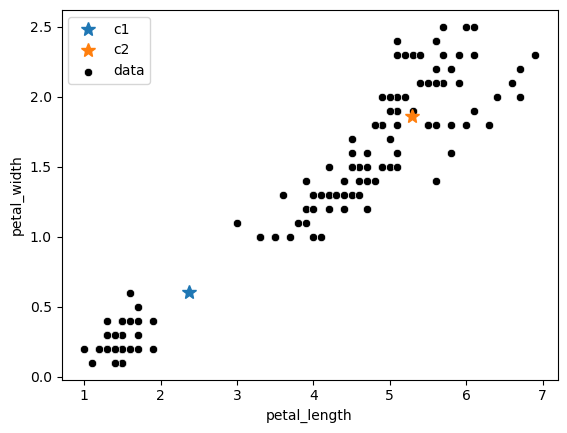

In [15]:
plot_centers_and_black_data(iris, (c1, c2))

In [16]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

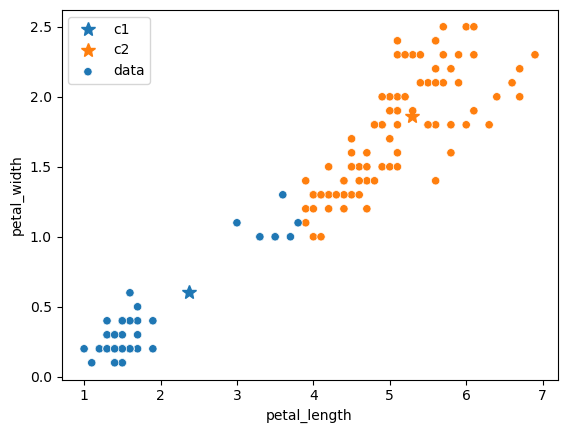

In [17]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [18]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

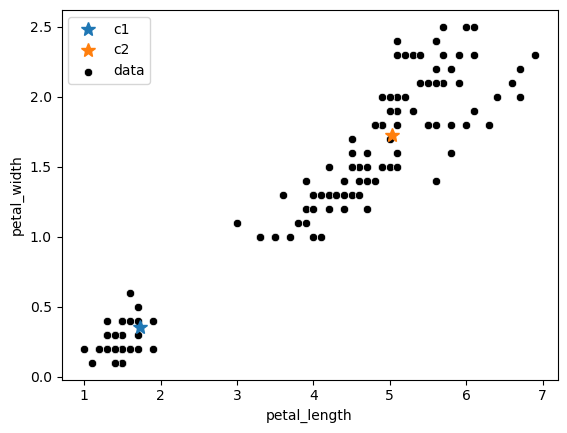

In [19]:
plot_centers_and_black_data(iris, (c1, c2))

In [20]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

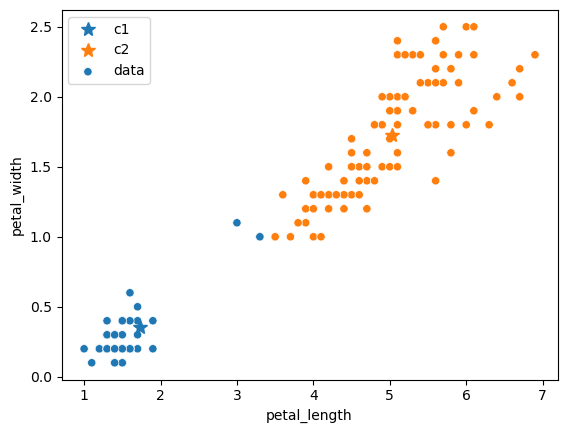

In [21]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [22]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

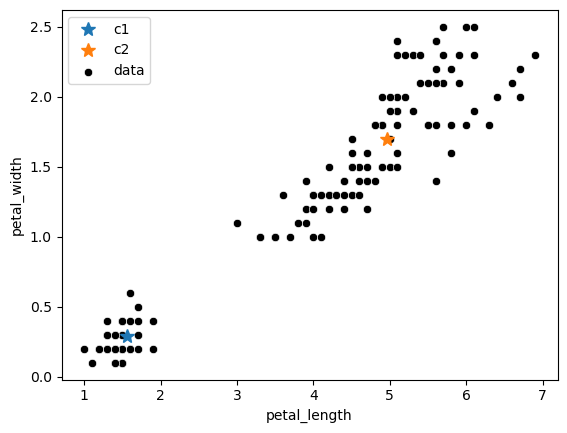

In [23]:
plot_centers_and_black_data(iris, (c1, c2))

In [24]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

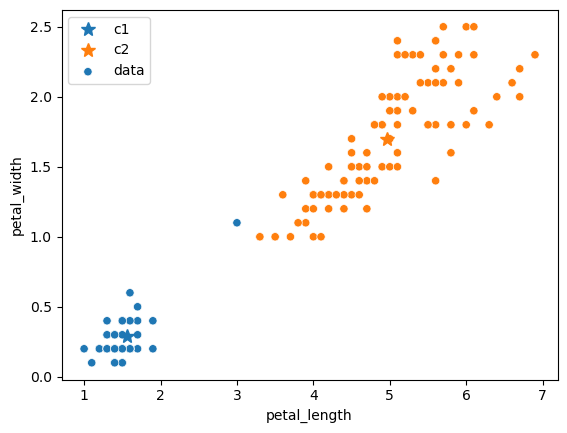

In [25]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [26]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

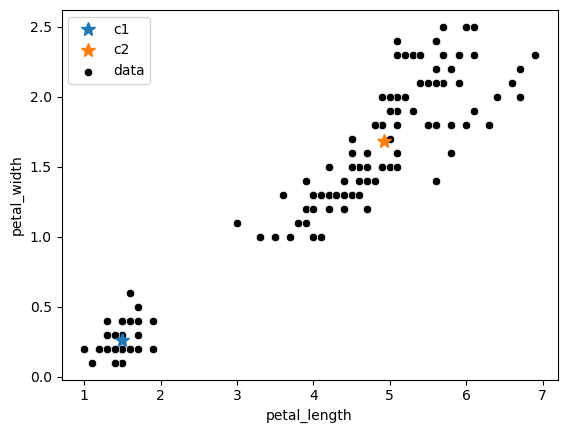

In [27]:
plot_centers_and_black_data(iris, (c1, c2))

In [28]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

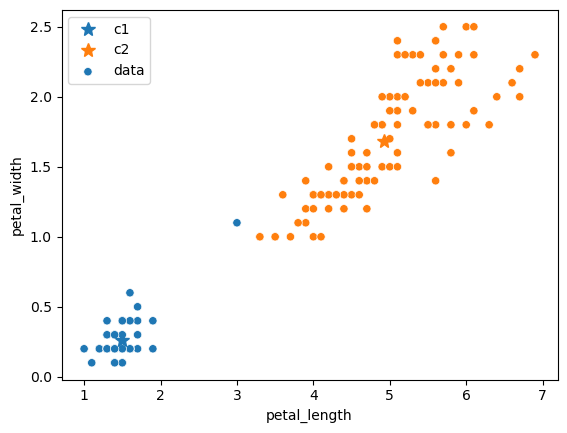

In [29]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [30]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

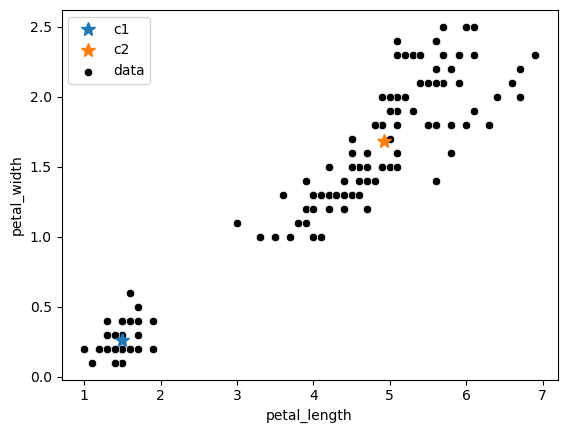

In [31]:
plot_centers_and_black_data(iris, (c1, c2))

In [32]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

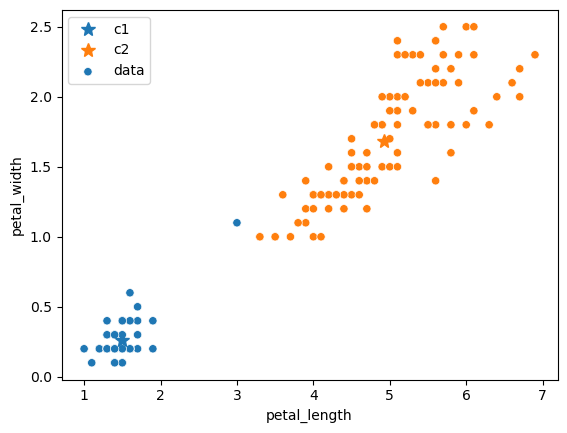

In [33]:
plot_centers_and_colorized_data(iris, (c1, c2))

### Example for K > 2

In [34]:
import copy
def compute_centers_after_N_iterations(data, column_names, centers, N):
    centers = copy.deepcopy(centers)
    
    for i in range(N):
        # Recompute clusters        
        dist_names = []
        for center_num in range(len(centers)):        
            data["dist" + str(center_num)] = centers[center_num].dist(data[column_names])
            dist_names.append("dist" + str(center_num))
        
        data["cluster"] = data[dist_names].apply(get_cluster_number, axis = 1)    
        
        # Update centers
        for center_num in range(len(centers)):
            for col_num in range(len(column_names)):
                col_name = column_names[col_num]
    
                centers[center_num].coordinates[col_num] = np.mean(data[data["cluster"] == center_num][col_name])

    return centers


In [35]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [36]:
def inertia(data, centers):
    total_inertia = 0
    for center_num in range(len(centers)):
        data_in_this_cluster = data[data["cluster"] == center_num]        
        total_inertia += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]]))
    return total_inertia

In [37]:
def distortion(data, centers):
    total_distortion = 0
    for center_num in range(len(centers)):
        data_in_this_cluster = data[data["cluster"] == center_num]        
        total_distortion += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]]))/len(data_in_this_cluster)
    return total_distortion

inertia: 44.88363871576328, distortion: 1.2530251953116613)


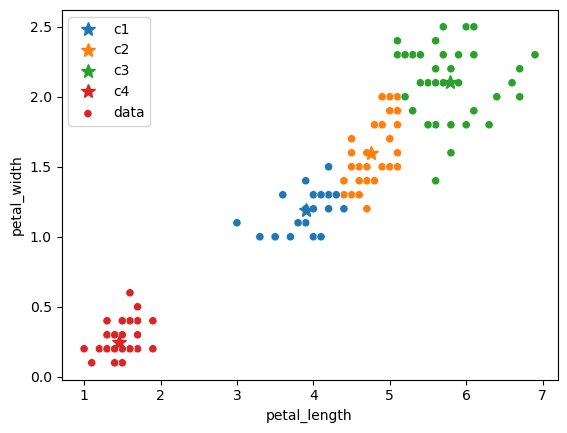

In [38]:
random.seed(25)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)

inertia: 45.87509130916156, distortion: 1.3068391699161572)


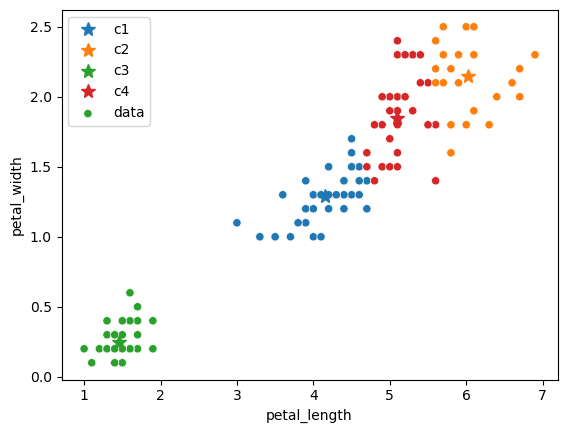

In [39]:
random.seed(29)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)

inertia: 54.272527867765156, distortion: 1.4992328098338596)


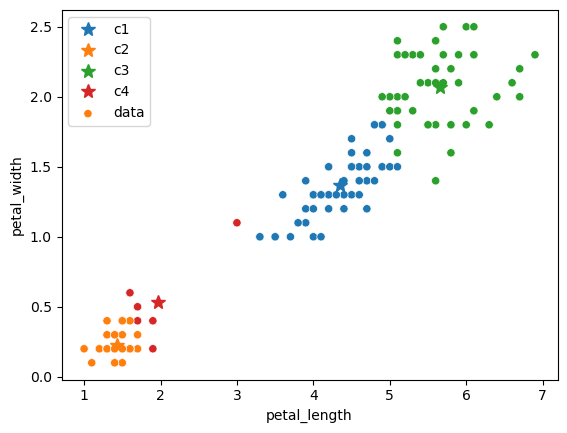

In [40]:
random.seed(40)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)

inertia: 44.88363871576328, distortion: 1.2530251953116613)


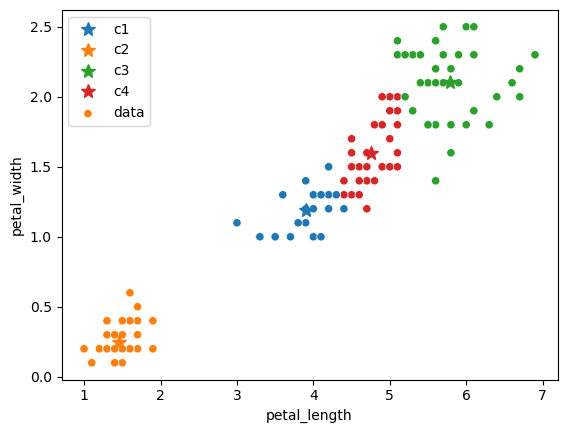

In [41]:
random.seed(75)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)

### Example of Inertia Failing to Match Intuition

In [42]:
c1.coordinates = [1.2, 0.15]
c2.coordinates = [4.906000000000001, 1.6760000000000006]
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

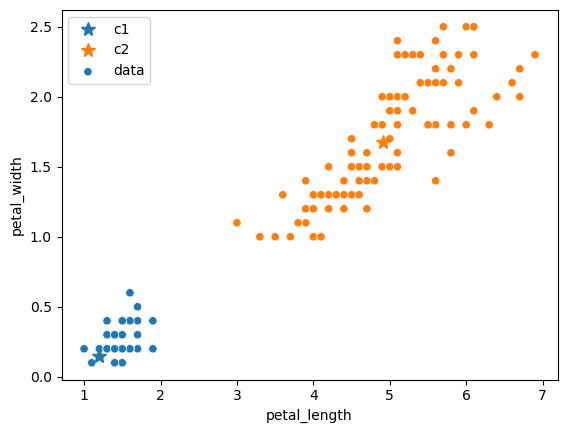

In [43]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [44]:
print(f"inertia: {inertia(iris, [c1, c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 94.3164648130483, distortion: 1.0959547804008838)


In [45]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

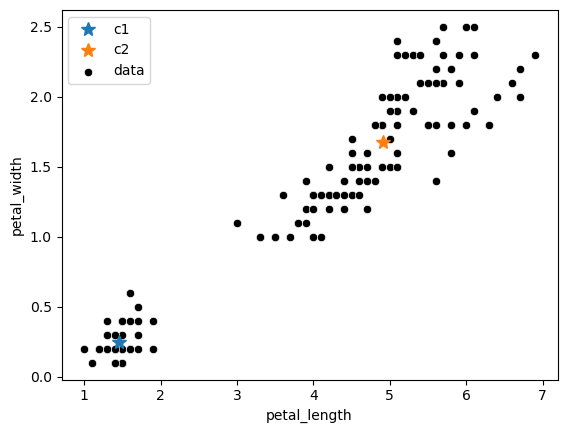

In [46]:
plot_centers_and_black_data(iris, (c1, c2))

In [47]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

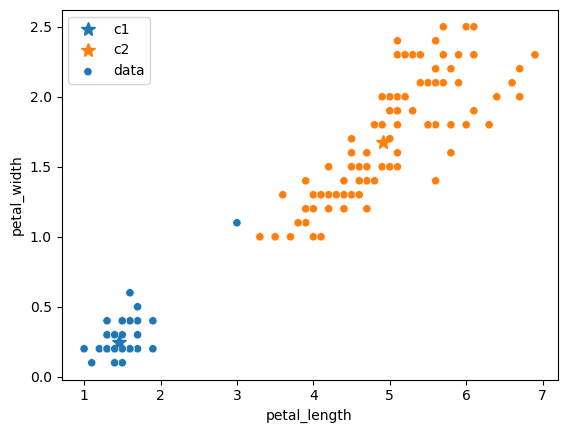

In [48]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [49]:
print(f"inertia: {inertia(iris, [c1, c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 87.2103463131798, distortion: 0.9775403068856574)


## Hierarchical Agglomerative Clustering

In [50]:
np.random.seed(42)
iris_small = iris.sample(13).loc[:, 'sepal_length':'petal_width'].reset_index(drop=True)
iris_small = iris_small.drop(8).reset_index(drop=True)

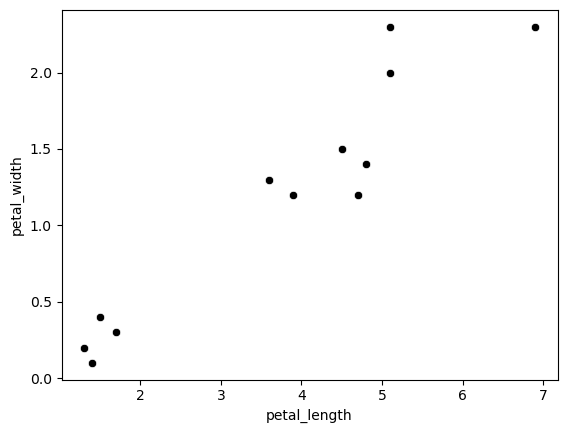

In [51]:
sns.scatterplot(data=iris_small, x="petal_length", y="petal_width", color="black");

In [52]:
iris_small["cluster"] = np.array(range(0, len(iris_small)))

In [53]:
iris_small

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,6.1,2.8,4.7,1.2,0
1,5.7,3.8,1.7,0.3,1
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,3
4,6.8,2.8,4.8,1.4,4
5,5.4,3.4,1.5,0.4,5
6,5.6,2.9,3.6,1.3,6
7,6.9,3.1,5.1,2.3,7
8,5.8,2.7,3.9,1.2,8
9,6.5,3.2,5.1,2.0,9


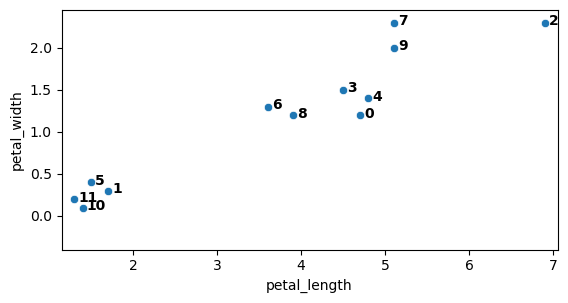

In [54]:
def plot_clusters(data):
    fig= plt.figure()
    p1 = sns.scatterplot(data=data, x="petal_length", y="petal_width")
    # plt.axis('equal')
    for line in range(0,data.shape[0]):
         p1.text(data["petal_length"][line]+0.05, data["petal_width"][line] - 0.03,   
         data["cluster"][line], horizontalalignment='left', 
         size='medium', color='black', weight='semibold')
    ax = plt.gca()
    plt.ylim(data["petal_width"].min()-0.5, data["petal_width"].max()+0.15)
    plt.xlim(data["petal_length"].min()-0.15, data["petal_length"].max()+0.15)
    ax.set_aspect('equal', adjustable='box')
    return fig
            
fig = plot_clusters(iris_small)

In [55]:
from scipy.spatial.distance import cdist

def closest_clusters(data):
    cluster_values = data["cluster"].unique()

    closest_pairs = []
    processed_pairs = set()

    while len(closest_pairs) < 3:
        smallest_distance = float("inf")
        best_pair = None

        for i, cnum1 in enumerate(cluster_values):
            for cnum2 in cluster_values[i+1:]:
                if (cnum1, cnum2) in processed_pairs or (cnum2, cnum1) in processed_pairs:
                    continue

                # Calculate the maximum distance between any two points in the clusters
                cluster1_points = data[data["cluster"] == cnum1][["petal_length", "petal_width"]]
                cluster2_points = data[data["cluster"] == cnum2][["petal_length", "petal_width"]]
                max_dist = cdist(cluster1_points, cluster2_points).max()

                if max_dist < smallest_distance:
                    smallest_distance = max_dist
                    best_pair = (cnum1, cnum2)

        if best_pair:
            closest_pairs.append((best_pair[0], best_pair[1], smallest_distance))
            processed_pairs.add(best_pair)

    return closest_pairs

In [56]:
def merge_clusters(data, cnum1, cnum2):
    # Merge the second cluster into the first
    data.loc[data["cluster"] == cnum2, "cluster"] = cnum1

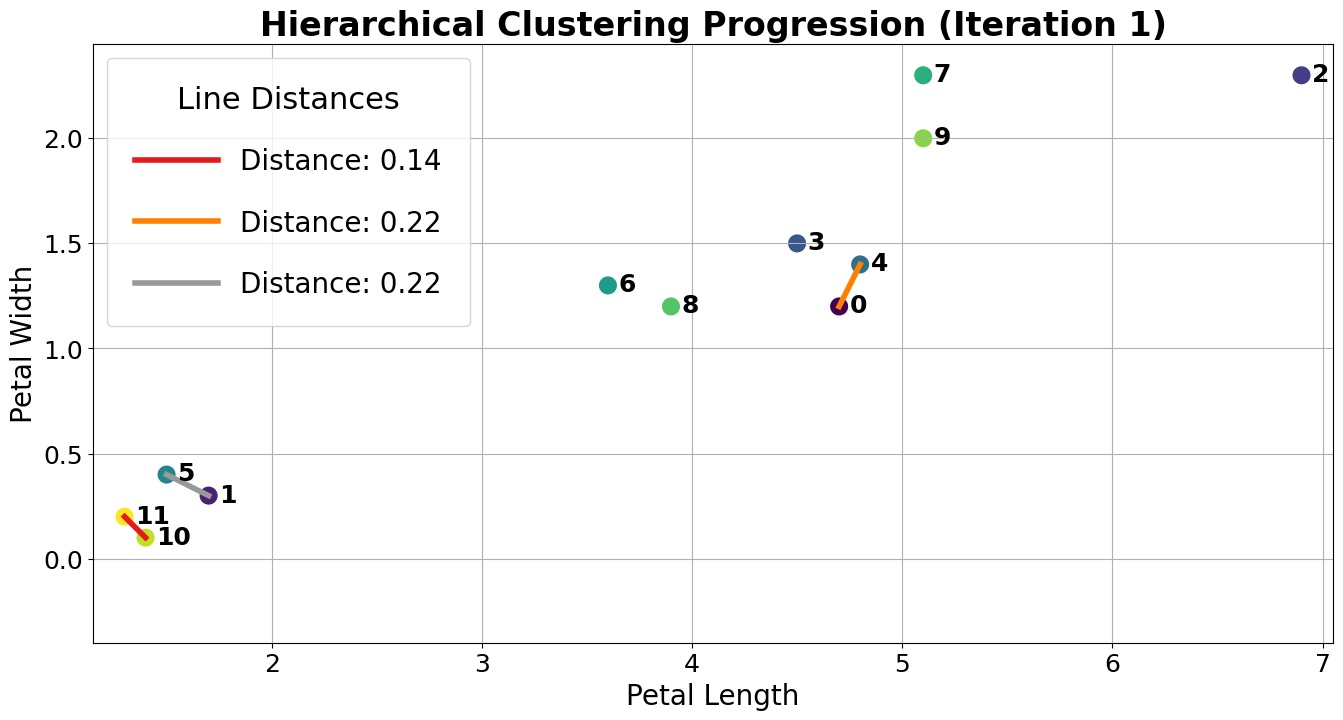

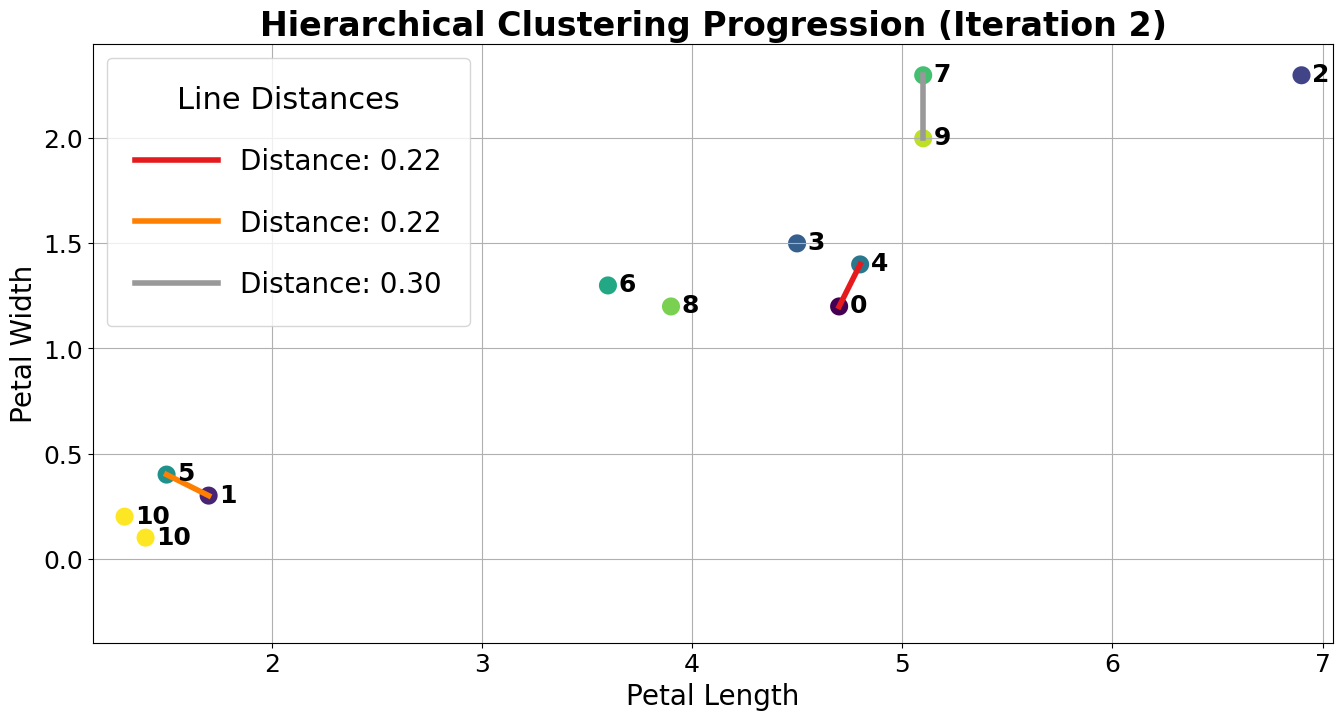

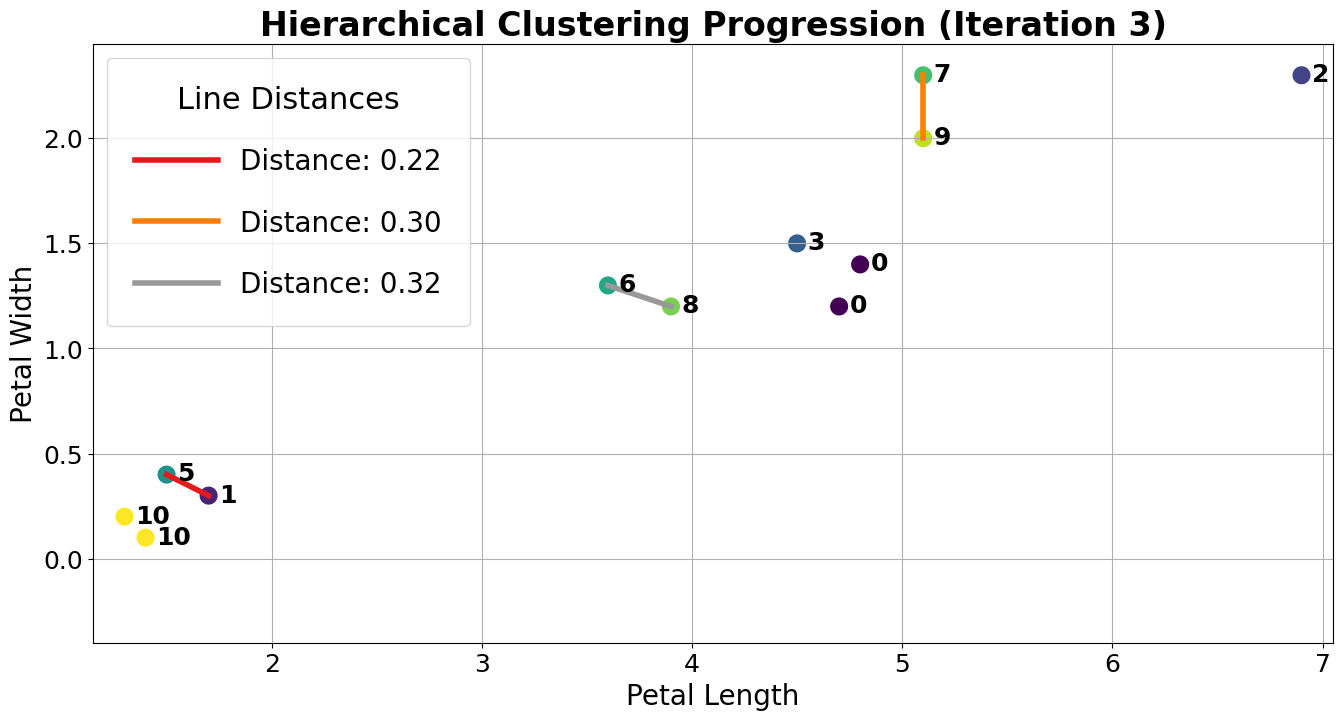

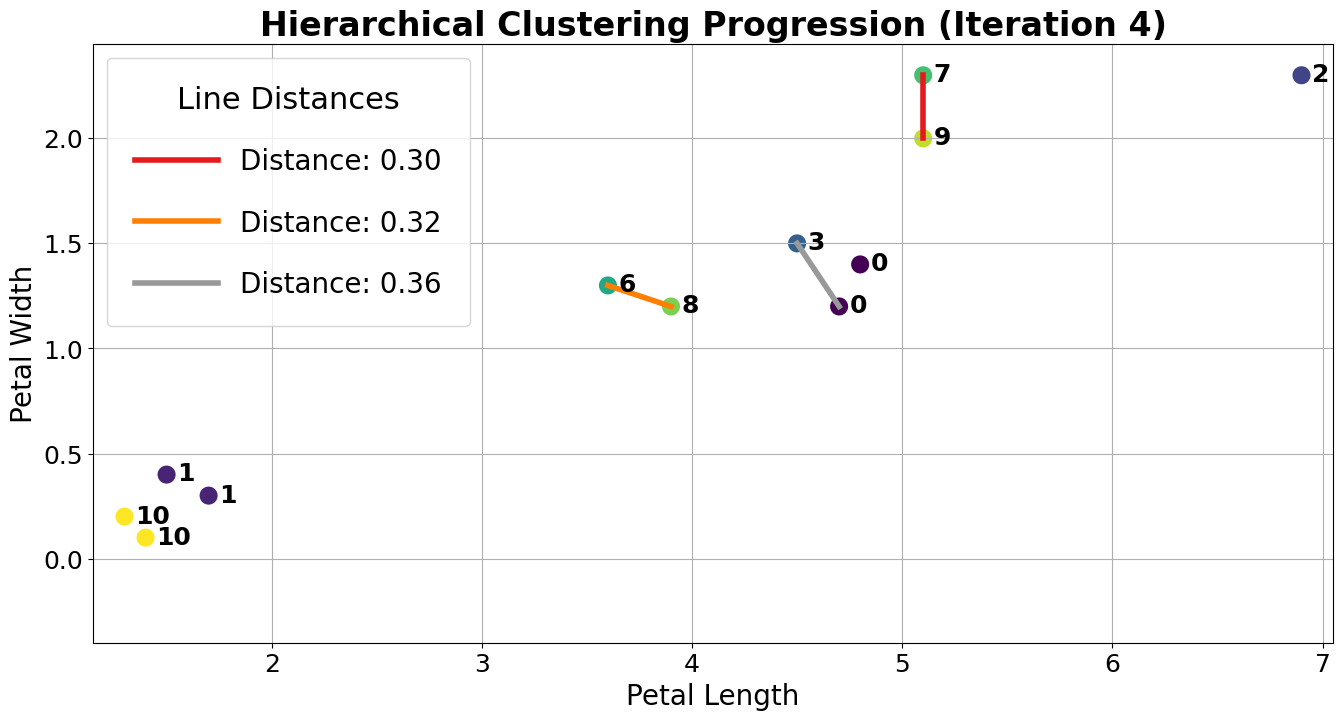

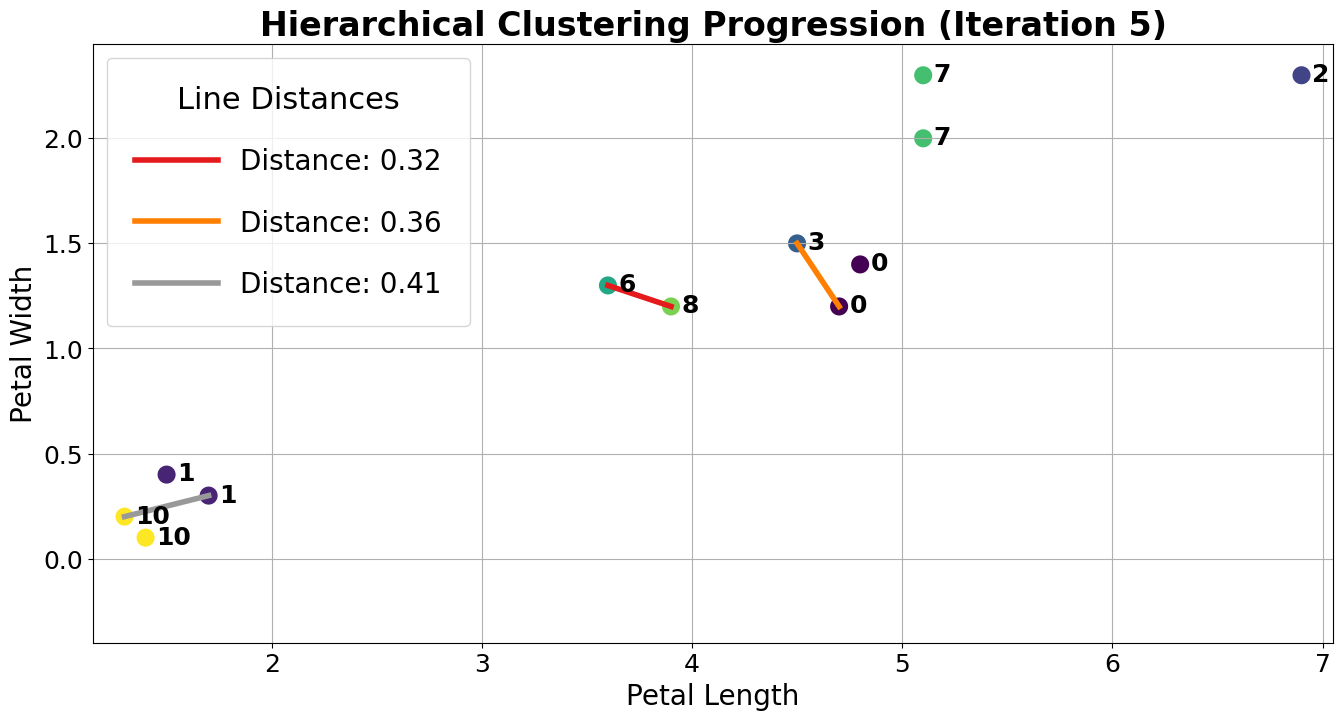

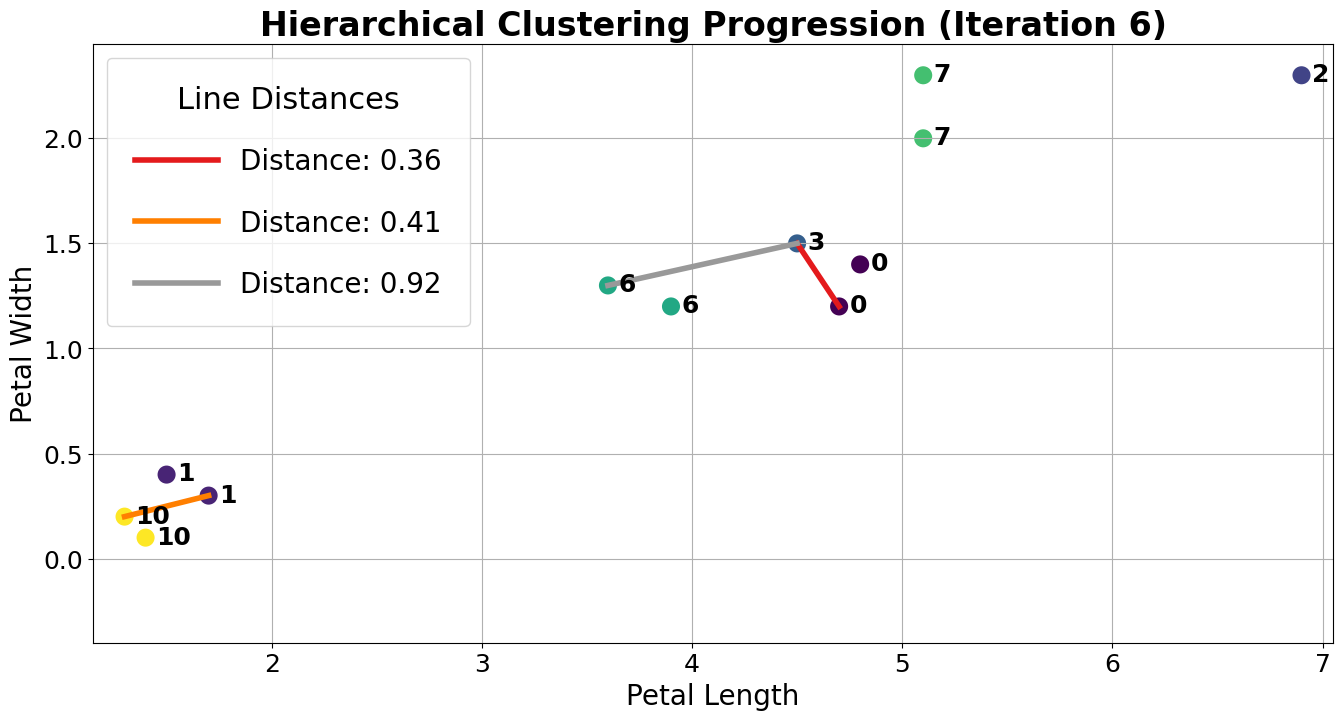

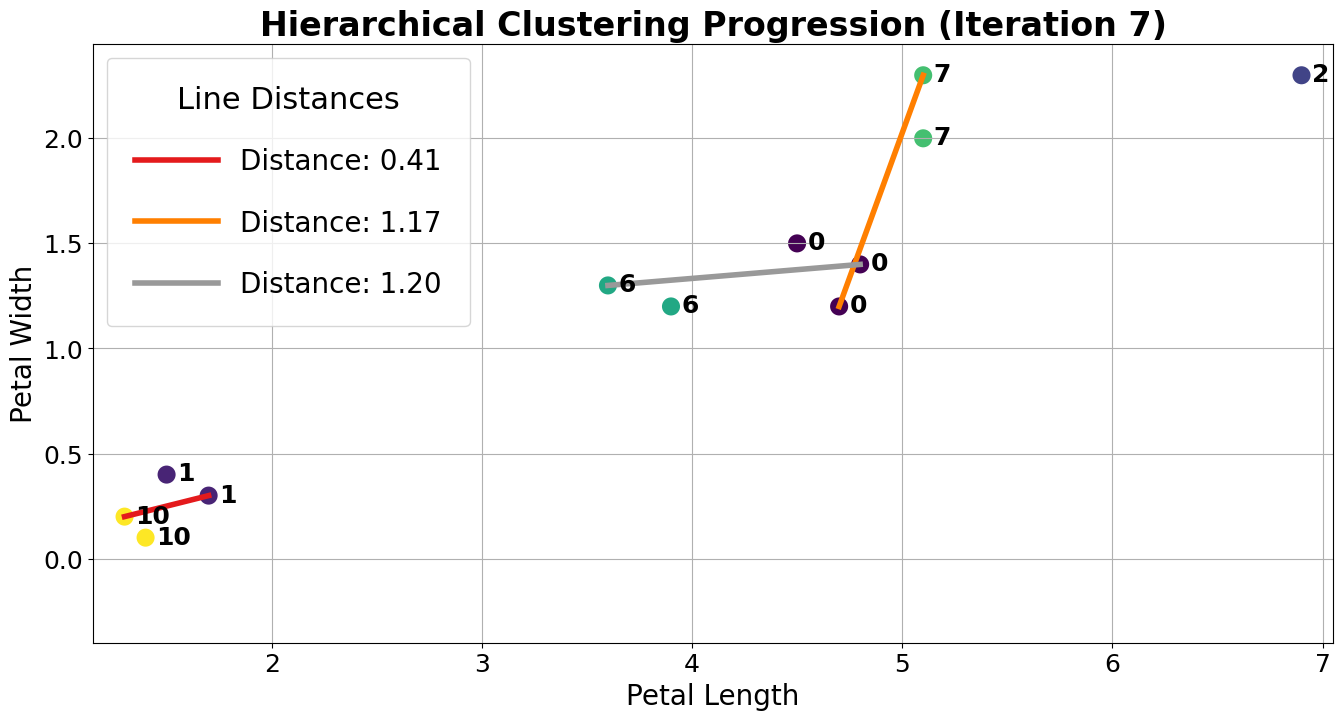

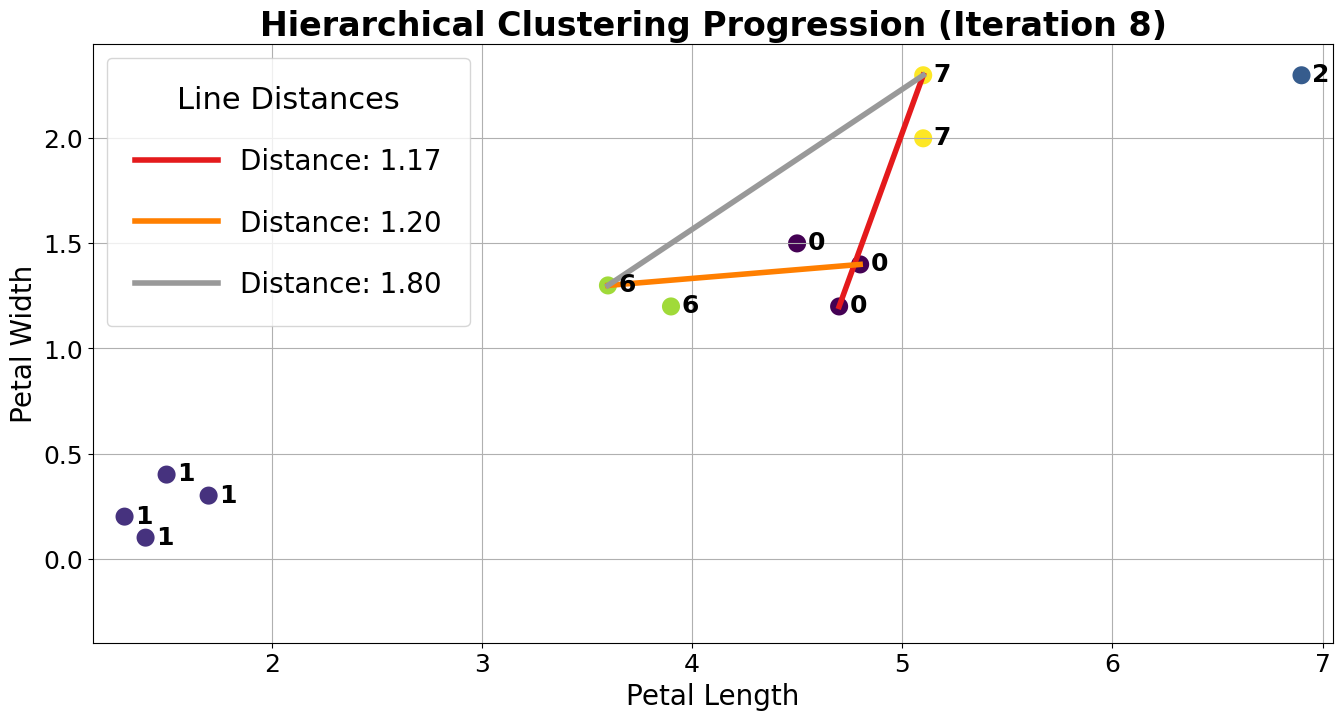

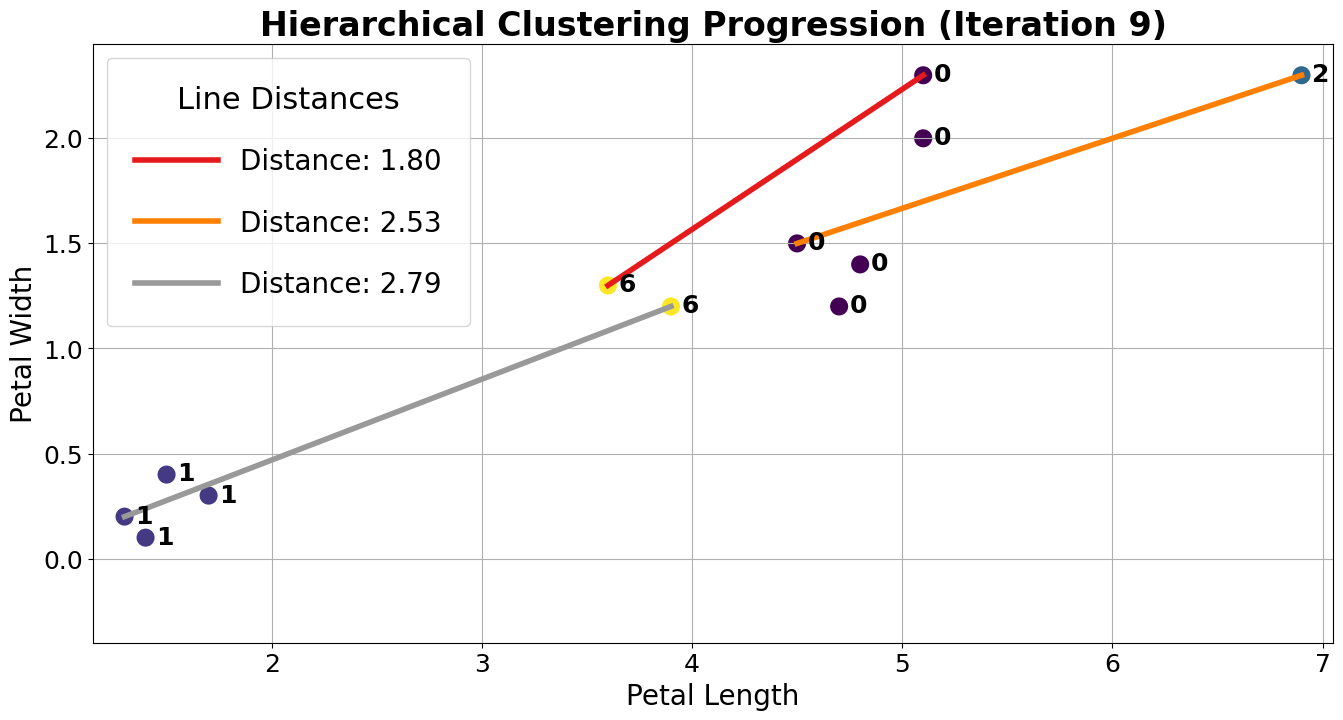

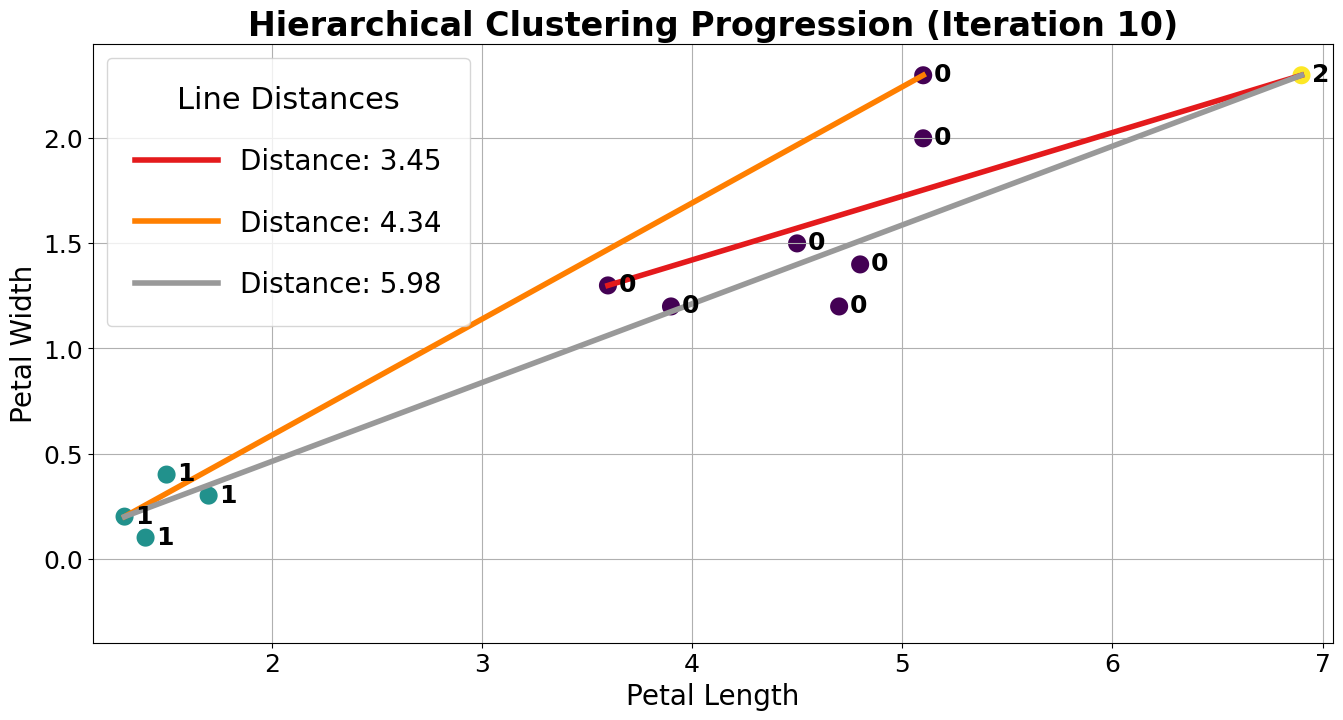

In [57]:
import matplotlib.cm as cm
from scipy.spatial import distance

def plot_clusters(iteration, data, top_pairs):
    fig= plt.figure(figsize=(16, 14))
    p1 = sns.scatterplot(
        data=data,
        x="petal_length",
        y="petal_width",
        hue="cluster",
        palette="viridis",
        legend=False,
        s=200
    )
    # plt.axis('equal')

    for line in range(0, data.shape[0]):
        p1.text(
            data["petal_length"][line] + 0.05,
            data["petal_width"][line] - 0.03,
            data["cluster"][line],
            horizontalalignment='left',
            size=18, 
            color='black',
            weight='semibold'
        )

    # Use a consistent colormap for the top 3 pairs in this iteration
    cmap = cm.get_cmap('Set1', len(top_pairs))  
    legend_lines = []  

    for i, (cnum1, cnum2, dist) in enumerate(top_pairs):
        cluster1_points = data[data["cluster"] == cnum1]
        cluster2_points = data[data["cluster"] == cnum2]
        
        if cluster1_points.empty or cluster2_points.empty:
            continue
        
        # Find the two points contributing to the maximum distance
        dists = distance.cdist(
            cluster1_points[["petal_length", "petal_width"]],
            cluster2_points[["petal_length", "petal_width"]]
        )
        max_dist_idx = np.unravel_index(np.argmax(dists), dists.shape) 
        point1 = cluster1_points.iloc[max_dist_idx[0]]
        point2 = cluster2_points.iloc[max_dist_idx[1]]
        
        # Draw the line between these points with a unique color
        line_color = cmap(i)
        plt.plot(
            [point1["petal_length"], point2["petal_length"]],
            [point1["petal_width"], point2["petal_width"]],
            linestyle='-',
            color=line_color,
            linewidth=4, 
            label=f"{dist:.2f}"
        )

        legend_lines.append((f"{dist:.2f}", line_color))

    legend_labels = [f"Distance: {dist}" for dist, _ in legend_lines]
    legend_colors = [color for _, color in legend_lines]
    handles = [
        plt.Line2D([0], [0], color=color, linestyle='-', lw=4) 
        for color in legend_colors
    ]
    plt.legend(handles, legend_labels, title="Line Distances", loc='upper right', fontsize=18, title_fontsize=20)

    plt.title(f'Hierarchical Clustering Progression (Iteration {iteration})', fontsize=24, weight='bold')
    plt.xlabel('Petal Length', fontsize=20)
    plt.ylabel('Petal Width', fontsize=20)
    plt.grid()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(
        handles, 
        legend_labels, 
        title="Line Distances", 
        loc='upper left', 
        fontsize=20,
        title_fontsize=22,
        labelspacing=1.2,
        handlelength=3,
        borderpad=1,
        frameon=True
    )
    ax = plt.gca()
    plt.ylim(data["petal_width"].min()-0.5, data["petal_width"].max()+0.15)
    plt.xlim(data["petal_length"].min()-0.15, data["petal_length"].max()+0.15)
    ax.set_aspect('equal', adjustable='box')
    plt.show()
    return fig

# Perform clustering with proper annotations
i = 0
while len(iris_small["cluster"].unique()) != 2:
    i += 1
    top_pairs = closest_clusters(iris_small)  # Get top 3 closest pairs
    plot_clusters(i, iris_small, top_pairs=top_pairs)  # Plot distances first
    cnum1, cnum2, _ = top_pairs[0]  # Take the closest pair to merge
    merge_clusters(iris_small, cnum1, cnum2)  # Merge after plotting distances


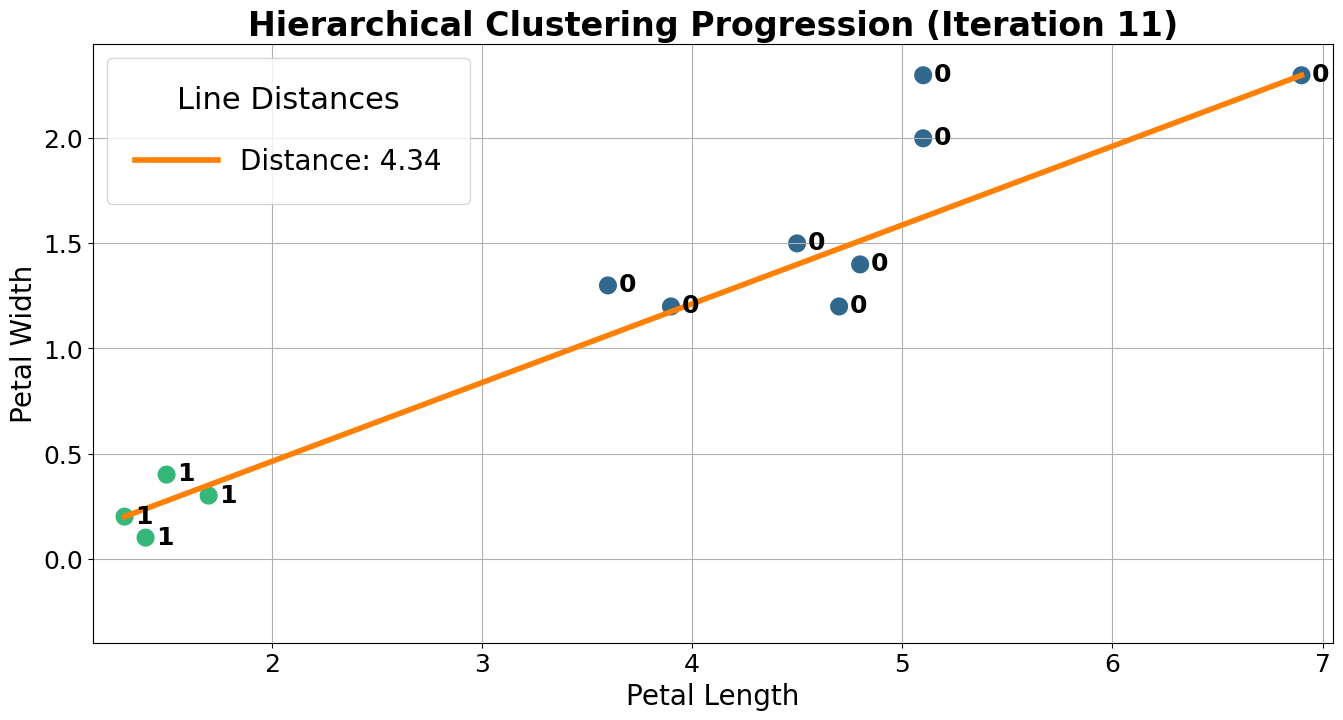

In [58]:
fig = plot_clusters(11, iris_small, top_pairs=top_pairs)  # Final clusters

## Run on full dataset

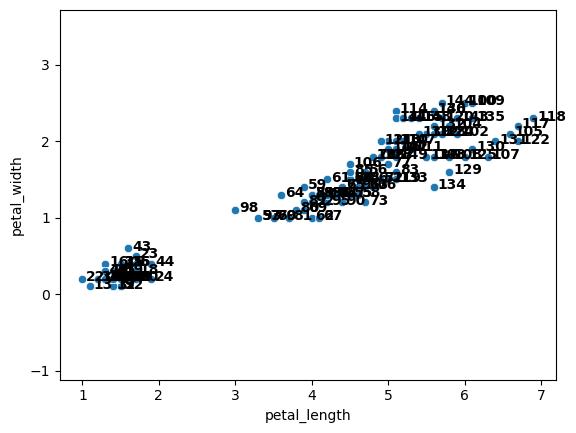

In [59]:
def plot_clusters(data):
    fig = plt.figure()
    p1 = sns.scatterplot(data=data, x="petal_length", y="petal_width")
    plt.axis('equal')
    for line in range(0,data.shape[0]):
         p1.text(data["petal_length"][line]+0.05, data["petal_width"][line] - 0.03,   
         data["cluster"][line], horizontalalignment='left', 
         size='medium', color='black', weight='semibold')
    return fig

iris_small = iris.copy()
iris_small["cluster"] = np.array(range(0, len(iris_small)))
fig = plot_clusters(iris_small)

In [60]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(iris[["petal_length", "petal_width"]])

In [61]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
iris["cluster"] = clustering.labels_

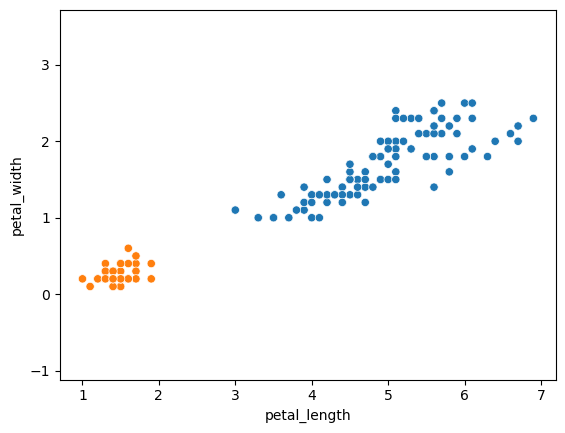

In [63]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", 
                hue ="cluster", legend=None);
plt.axis('equal');

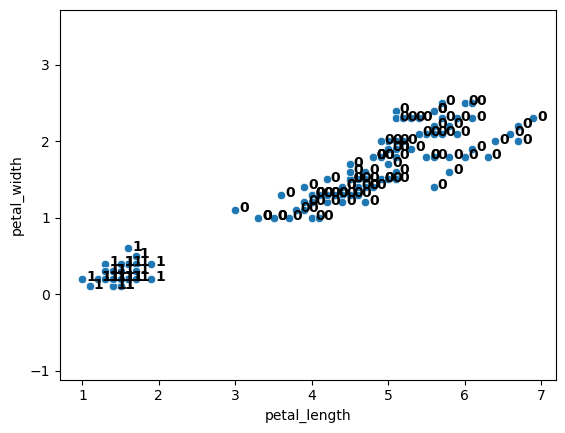

In [64]:
fig = plot_clusters(iris)

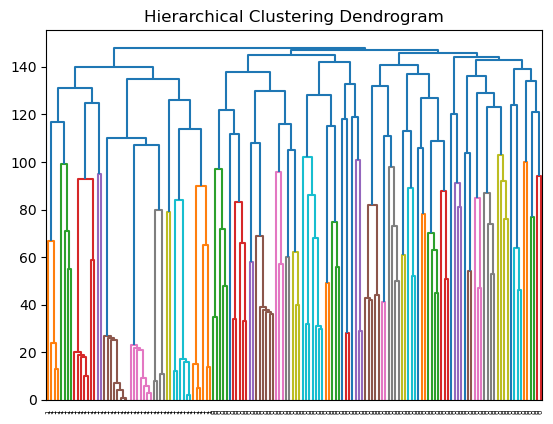

In [65]:
# From https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)

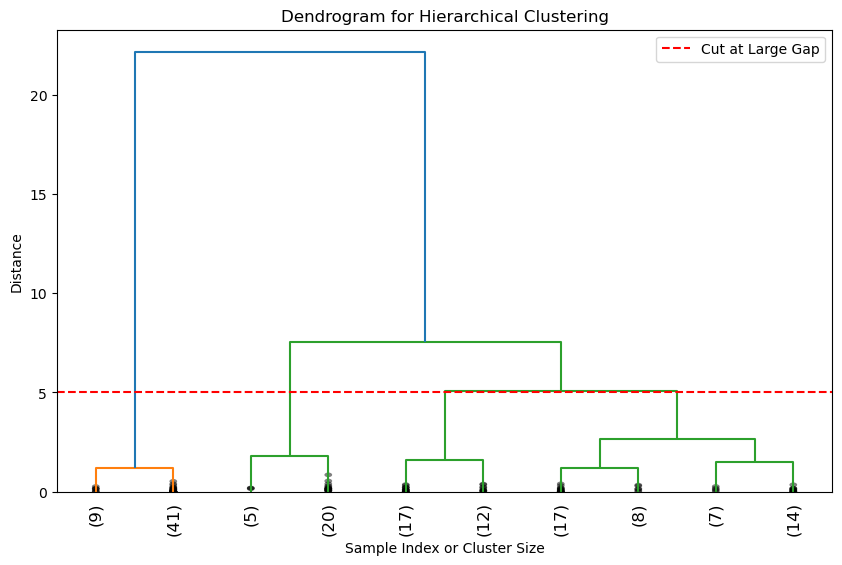

In [66]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
iris_small_scaled = scaler.fit_transform(iris[["petal_length", "petal_width"]])

# Perform hierarchical clustering
linkage_matrix_small = linkage(iris_small_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix_small,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=5, color='r', linestyle='--', label='Cut at Large Gap')
plt.legend()
plt.show()

### Elbow Method

In [67]:
from sklearn.cluster import KMeans 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = iris[["petal_length", "petal_width"]]
    
for k in K: 
    # Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X)     
      
    distortions.append(sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

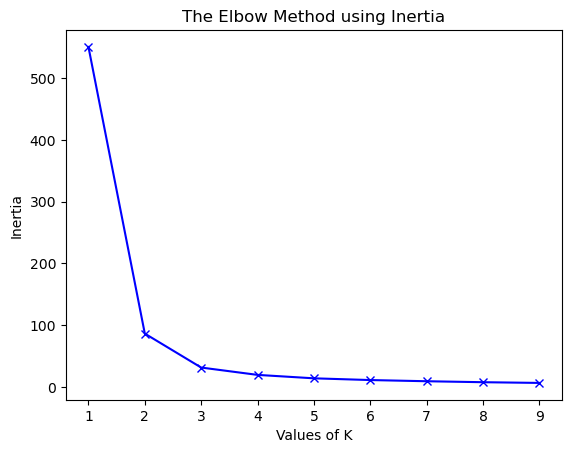

In [68]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia');

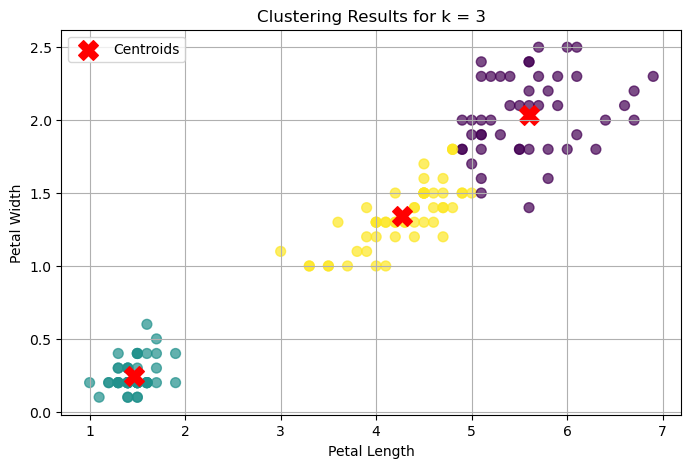

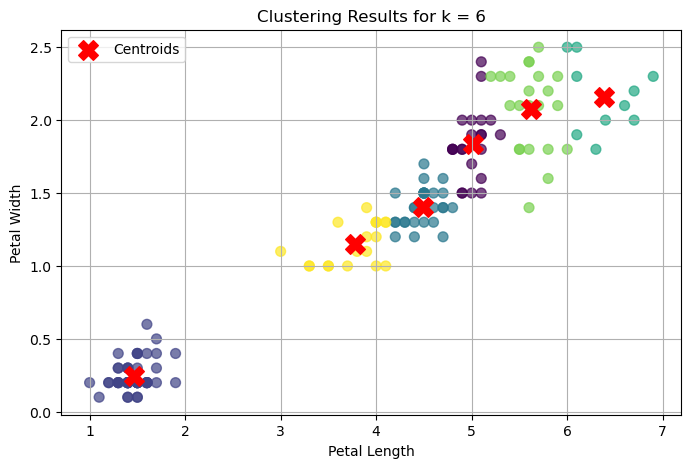

In [69]:
# Analyze clustering results for k=3 (optimal) and k=6 (suboptimal)
k_values_to_analyze = [3, 6]
results = {}

for k in k_values_to_analyze:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(iris[['petal_length', 'petal_width']])
    results[k] = {
        "model": kmeans,
        "clusters": clusters
    }

# Plot the clustering results
for k, result in results.items():
    plt.figure(figsize=(8, 5))
    plt.scatter(
        iris['petal_length'],
        iris['petal_width'],
        c=result['clusters'],
        cmap='viridis',
        s=50,
        alpha=0.7
    )
    plt.scatter(
        result['model'].cluster_centers_[:, 0],
        result['model'].cluster_centers_[:, 1],
        c='red',
        marker='X',
        s=200,
        label='Centroids'
    )
    plt.title(f'Clustering Results for k = {k}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()
    plt.grid()
    plt.show()


### Silhouette Scores

In [70]:
X.loc[(X["petal_length"] < 3.2) & (X["petal_length"] > 2)]

,petal_length,petal_width
98,3.0,1.1


For n_clusters = 2 The average silhouette_score is : 0.7669465622770762


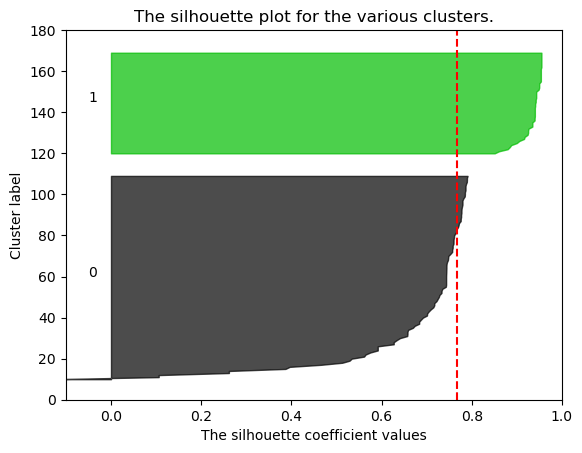

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

fig, ax1 = plt.subplots(1, 1)

n_clusters = 2

# The 1st subplot is the silhouette plot.
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--");

In [72]:
min(sample_silhouette_values)

-0.13132990547983361

For n_clusters = 3 The average silhouette_score is : 0.6573949269287823


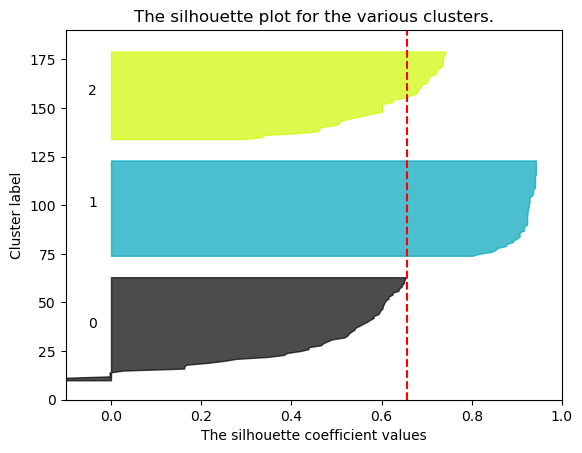

In [73]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3).fit(iris[["petal_length", "petal_width"]])


fig, ax1 = plt.subplots(1, 1)

n_clusters = 3

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for the average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--");

In [74]:
min(sample_silhouette_values)

-0.14062817006789843

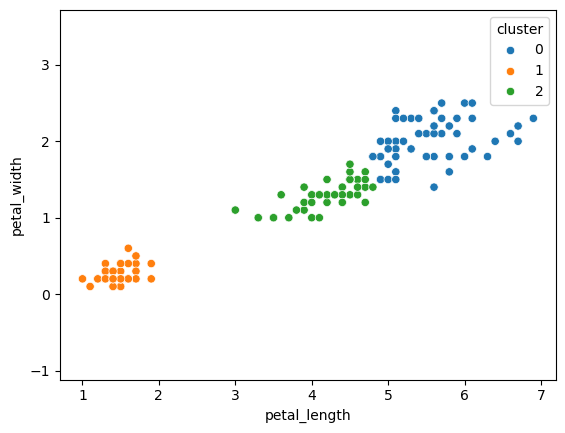

In [75]:
iris["cluster"] = cluster_labels
current_palette = sns.color_palette()[0:3]
sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", hue="cluster", palette = current_palette);
plt.axis('equal');